# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 140590 files belonging to 38 classes.


### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35144 files belonging to 38 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [13]:
cnn.add(tf.keras.layers.Flatten())

In [14]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [15]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [16]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phase

In [17]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [254]:
cnn.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_124 (Conv2D)         (None, 128, 128, 32)      896       
                                                                 
 conv2d_125 (Conv2D)         (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_126 (Conv2D)         (None, 63, 63, 64)        18496     
                                                                 
 conv2d_127 (Conv2D)         (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                               

In [22]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
4394/4394 [==============================] - 987s 223ms/step - loss: 0.9607 - accuracy: 0.7149 - val_loss: 0.2951 - val_accuracy: 0.9073
Epoch 2/10
4394/4394 [==============================] - 602s 137ms/step - loss: 0.2325 - accuracy: 0.9248 - val_loss: 0.1388 - val_accuracy: 0.9558
Epoch 3/10
4394/4394 [==============================] - 595s 135ms/step - loss: 0.1279 - accuracy: 0.9579 - val_loss: 0.1358 - val_accuracy: 0.9593
Epoch 4/10
4394/4394 [==============================] - 593s 135ms/step - loss: 0.0819 - accuracy: 0.9728 - val_loss: 0.1883 - val_accuracy: 0.9450
Epoch 5/10
4394/4394 [==============================] - 594s 135ms/step - loss: 0.0623 - accuracy: 0.9798 - val_loss: 0.1071 - val_accuracy: 0.9676
Epoch 6/10
4394/4394 [==============================] - 594s 135ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0969 - val_accuracy: 0.9715
Epoch 7/10
4394/4394 [==============================] - 595s 135ms/step - loss: 0.0403 - accuracy: 0.9871 - val_

## Evaluating Model

In [23]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

4394/4394 [==============================] - 155s 35ms/step - loss: 0.0097 - accuracy: 0.9970
Training accuracy: 0.9969699382781982


In [24]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

1099/1099 [==============================] - 39s 35ms/step - loss: 0.0893 - accuracy: 0.9772
Validation accuracy: 0.9772365093231201


### Saving Model

In [28]:
cnn.save('trained_plant_disease_model.keras')

In [29]:
training_history.history #Return Dictionary of history

{'loss': [0.960730254650116,
  0.2324584275484085,
  0.12793053686618805,
  0.08191239088773727,
  0.06227141618728638,
  0.04893406480550766,
  0.04030898958444595,
  0.03698626533150673,
  0.0326760858297348,
  0.0292996596544981],
 'accuracy': [0.7148730158805847,
  0.9248239398002625,
  0.9578917622566223,
  0.9727576375007629,
  0.9797567129135132,
  0.9844868183135986,
  0.987139880657196,
  0.9882922172546387,
  0.9897148013114929,
  0.9909310936927795],
 'val_loss': [0.295087993144989,
  0.1388247311115265,
  0.13575048744678497,
  0.18834608793258667,
  0.10707694292068481,
  0.0968870297074318,
  0.1336226910352707,
  0.08167165517807007,
  0.1076001450419426,
  0.08925413340330124],
 'val_accuracy': [0.9072957038879395,
  0.9557819366455078,
  0.9592533707618713,
  0.9449692964553833,
  0.9676189422607422,
  0.9714887142181396,
  0.9645458459854126,
  0.9756430387496948,
  0.9716025590896606,
  0.9772365093231201]}

In [30]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [31]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

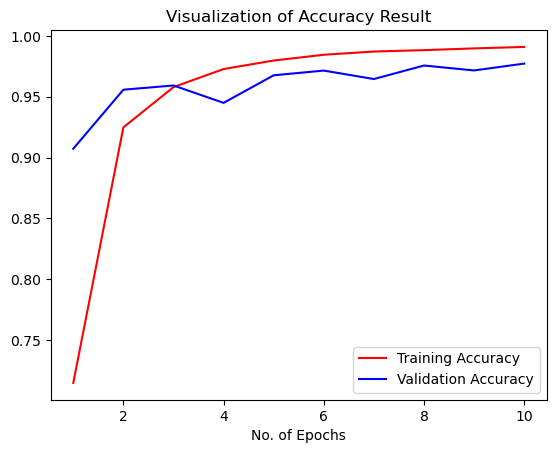

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [33]:
class_name = validation_set.class_names

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 35144 files belonging to 38 classes.


In [35]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

35144/35144 [==============================] - 155s 4ms/step


In [40]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [41]:
Y_true

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
predicted_categories

<tf.Tensor: shape=(35144,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [44]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.97      0.98      1008
                                 Apple___Black_rot       0.98      0.99      0.98       994
                          Apple___Cedar_apple_rust       0.99      0.98      0.99       880
                                   Apple___healthy       0.99      0.97      0.98      1004
                               Blueberry___healthy       0.97      0.98      0.97       908
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       842
                 Cherry_(including_sour)___healthy       0.92      1.00      0.96       912
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.88      0.92       820
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       954
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

### Confusion Matrix Visualization

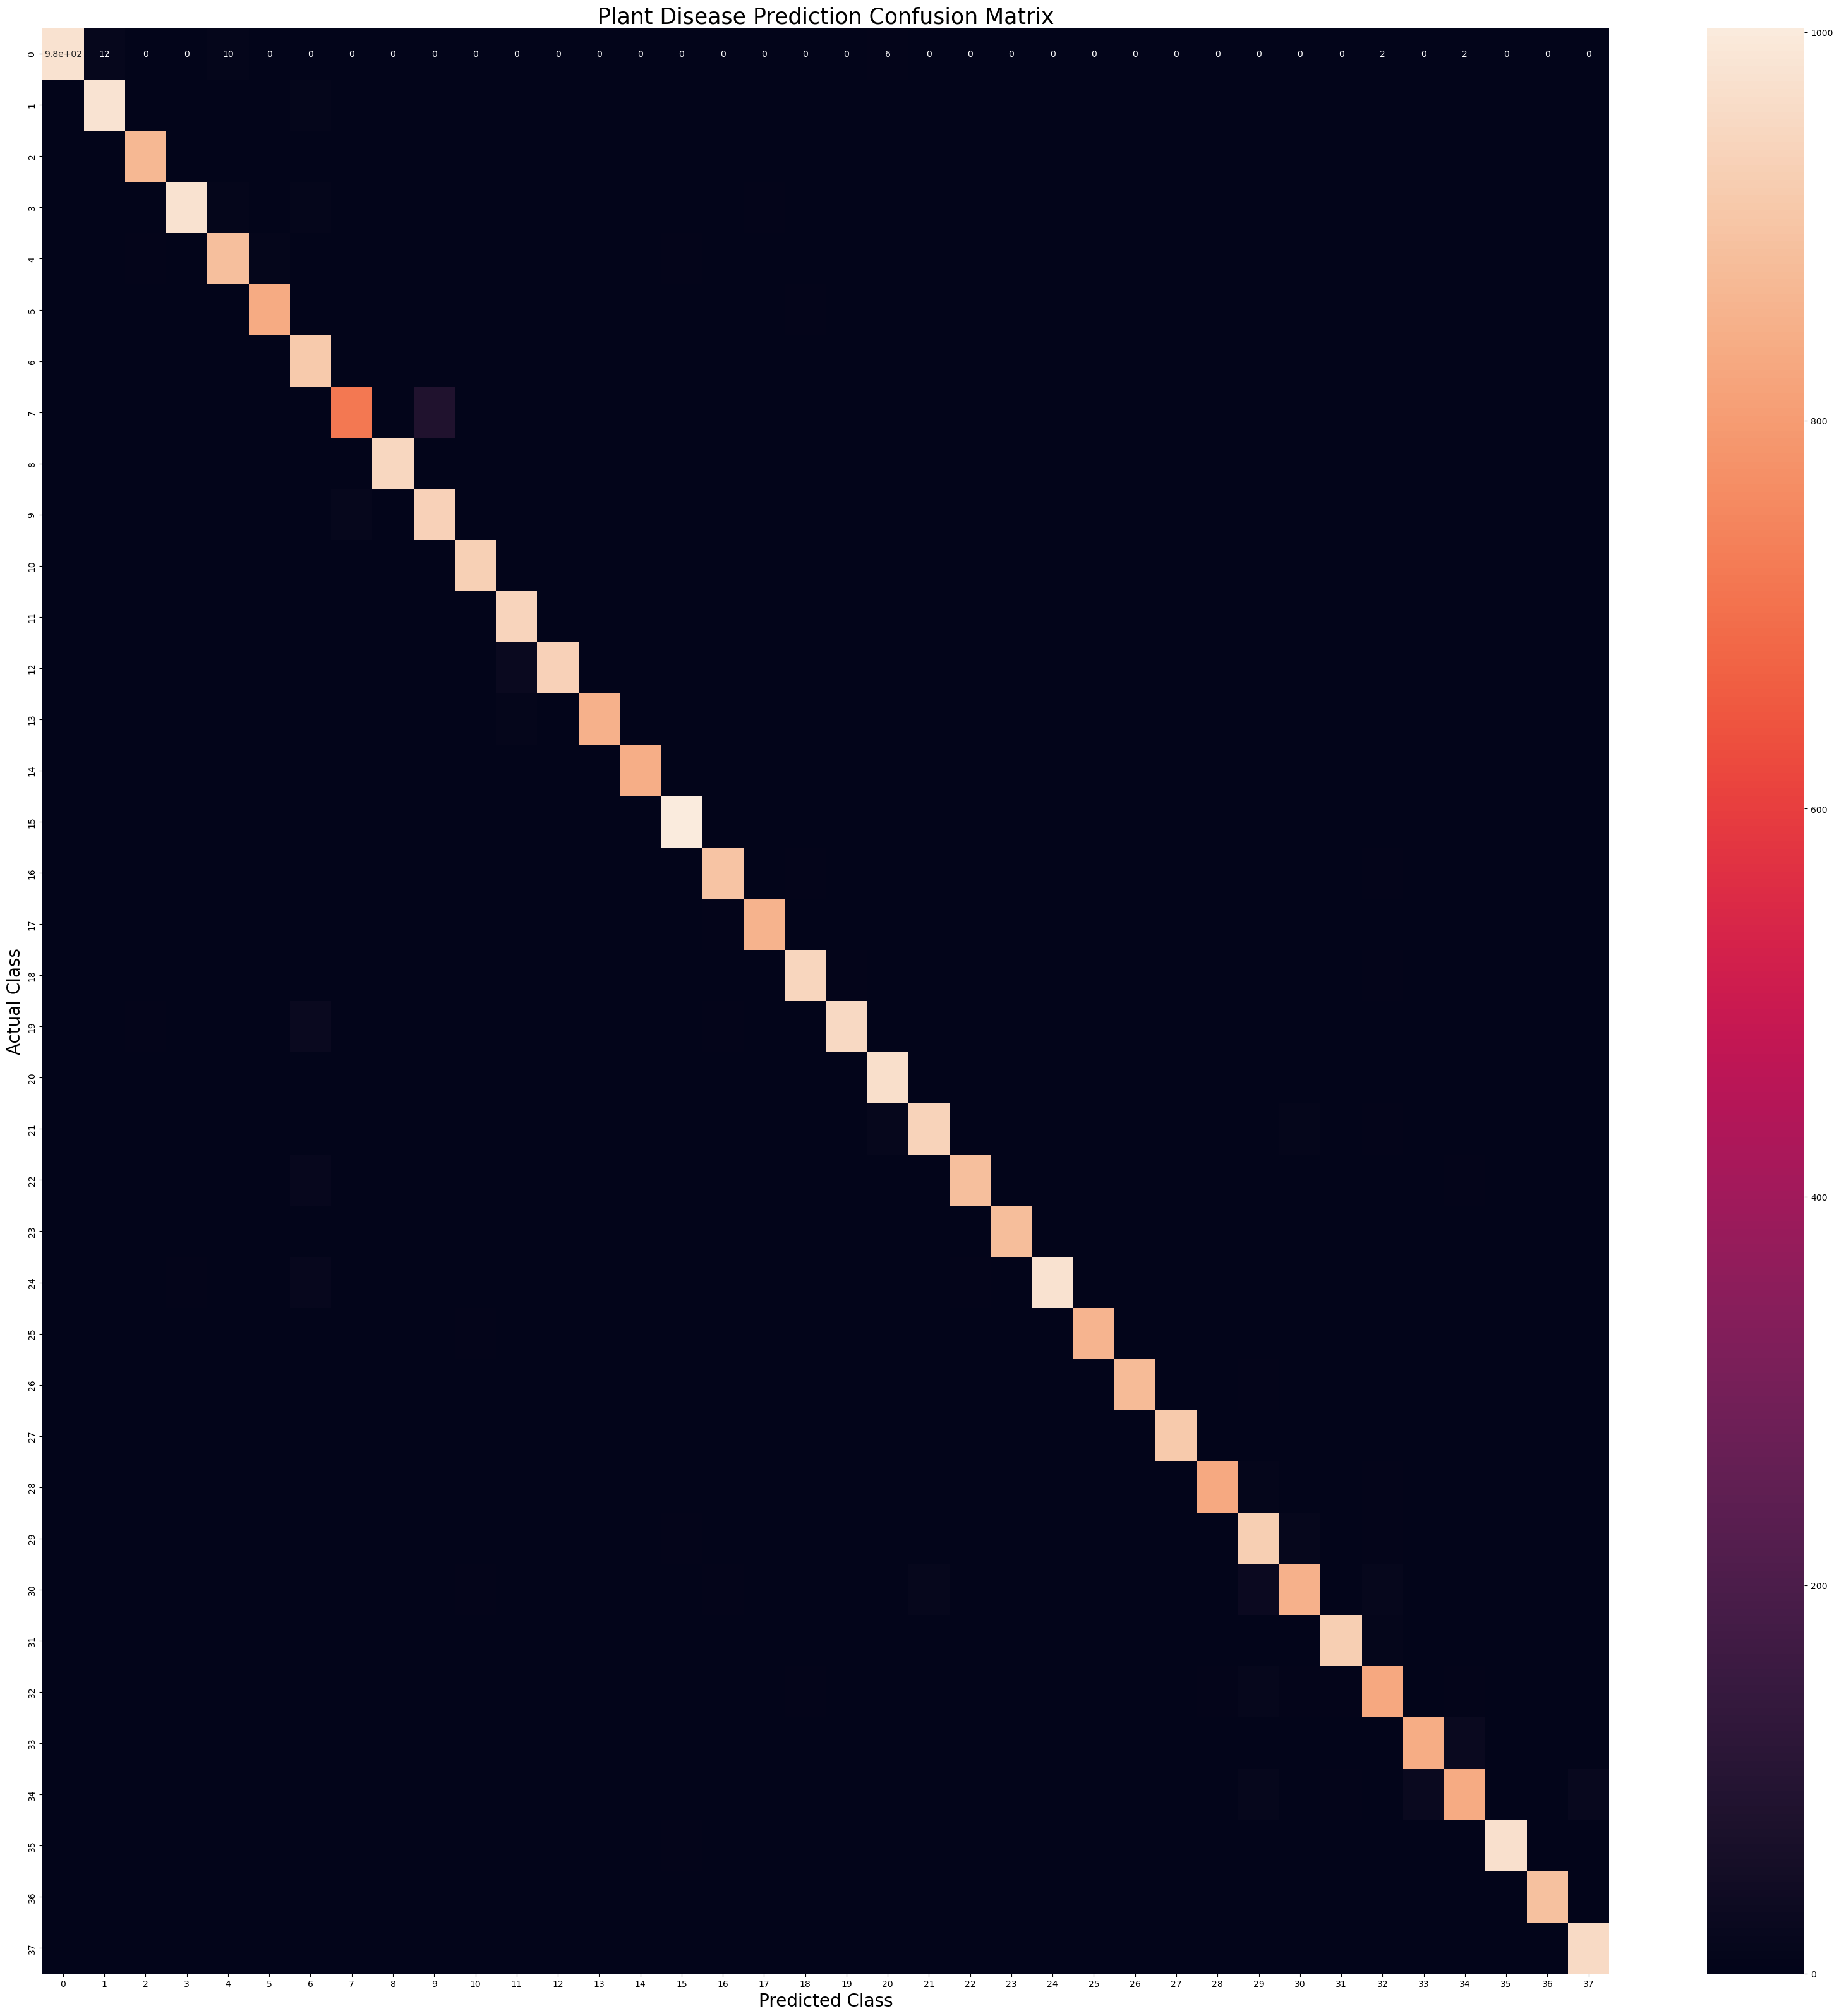

In [45]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()